Author: Carlos Roberto de Melo
    
Date: 12/11/2020
    
Goal: Mask the arcs in F160w image, and then interpolate over them.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

data_path = "/home/carlos/Desktop/HST Data Reduction/Data/MGE Models/"

## Selecting only the arcs

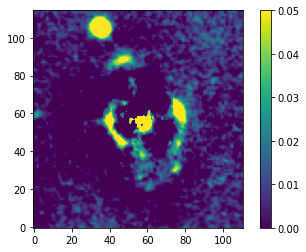

In [2]:
#Load image residual

hdu = fits.open(data_path + "Arcs_Resisual.fits") #Image
img = hdu[0].data                               #Image data

#Plot img

plt.imshow(img, origin="lower", vmin=0, vmax=0.05)
plt.colorbar()
plt.show()

In [3]:
import scribbler

#Select and drawn the mask
scribbler = scribbler.Scribbler(image=img)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/carlos/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/home/carlos/anaconda3/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 259, in resize
    self.draw()
  File "/home/carlos/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/carlos/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/home/carlos/anaconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7fc2c5568d90>
Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/carlos/anaconda3/lib

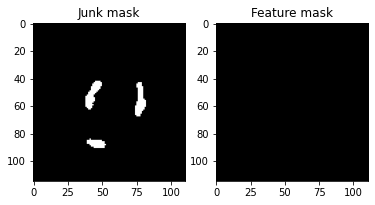

In [4]:
mask = scribbler.show_mask()

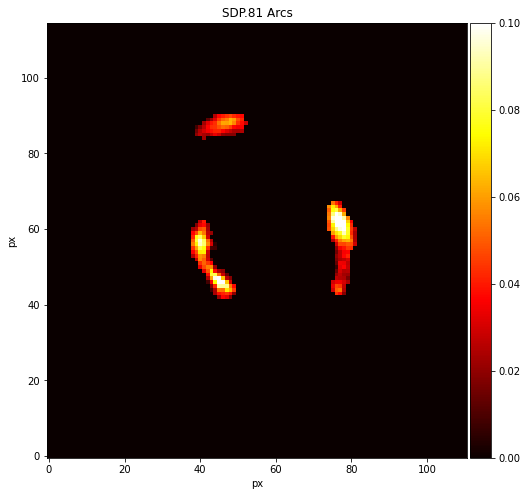

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


plt.figure(figsize=(8,8))
ax = plt.gca()

plt.title("SDP.81 Arcs")
plot = plt.imshow(img*mask, origin="lower", interpolation="nearest", vmin=0, vmax=0.1, cmap="hot")
plt.xlabel("px")
plt.ylabel("px")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(plot, cax=cax)

#plt.savefig(data_path+"Interpoleted.png",
#                    fmt="png", bbox_inches='tight', dpi=200)

In [6]:
#Saving img with arcs

fits.writeto(filename=data_path+"Arcs.fits", data=img*mask, overwrite=True)

## Masking arcs in the original image

In [7]:
from mpdaf.obj import Image
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

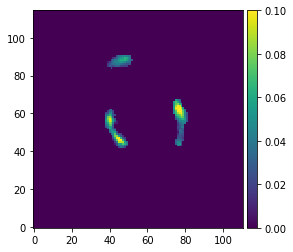

In [8]:
#Open image with arcs

arcs = Image(data_path+ "Arcs.fits")
arcs.plot(vmin=0, vmax=0.1, colorbar="v")

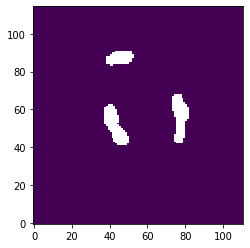

In [9]:
arcs_position = np.where(arcs.data.data !=0)  #Position of the arcs
mask = np.empty_like(arcs.data.data)          #Mask with same dimension of data
mask[:] = 1                                   #All position different from arcs should be iqualto one
mask[arcs_position] = np.nan                       #Arcs position should be nan

plt.imshow(mask, origin="lower")              #Plot mask

fits.writeto(filename=data_path+"mask.fits", data=mask, overwrite=True)  #Save mask in fits file

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


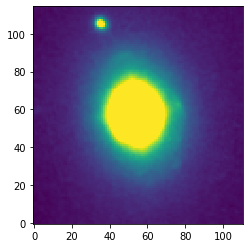

In [10]:
#Open original image

img = Image("/home/carlos/Desktop/HST Data Reduction/Data/Centered/HST_final.fits")         #Original
img.plot(zscale=True)

In [11]:
#Mask arcs position using mask created above

img_masked = img*mask
img_masked.write(data_path+"HST_Masked.fits")

INFO: 
        Inconsistent SIP distortion information is present in the current WCS:
        SIP coefficients were detected, but CTYPE is missing "-SIP" suffix,
        therefore the current WCS is internally inconsistent.

        Because relax has been set to True, the resulting output WCS will have
        "-SIP" appended to CTYPE in order to make the header internally consistent.

        However, this may produce incorrect astrometry in the output WCS, if
        in fact the current WCS is already distortion-corrected.

        Therefore, if current WCS is already distortion-corrected (eg, drizzled)
        then SIP distortion components should not apply. In that case, for a WCS
        that is already distortion-corrected, please remove the SIP coefficients
        from the header.

         [astropy.wcs.wcs]


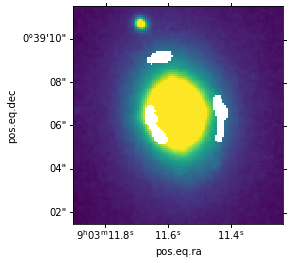

In [12]:
img_masked.plot(zscale=True, use_wcs=True)

## Interpolate Image

In [13]:
from scipy import interpolate
from mpdaf.obj import Image

In [14]:
#Original image *with* arcs to compute the resisual in the end

original = Image("/home/carlos/Desktop/HST Data Reduction/Data/Centered/HST_final.fits")

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


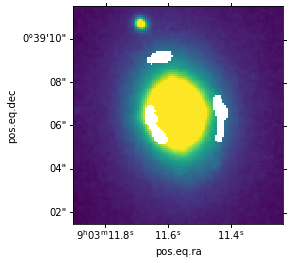

In [15]:
#Image *without* arcs to interpolet across it
img_masked = Image(data_path+"HST_Masked.fits")
img_masked.plot(zscale=True, use_wcs=True)

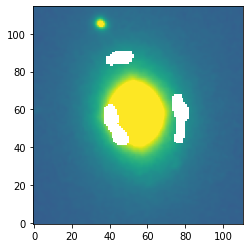

In [16]:
to_interp = img_masked.data.data                      #Just a variable change to save lines
plt.imshow(to_interp, vmin=0, vmax=1, origin="lower") #check data

## Linear interpolation 

In [17]:
#Generating the grid on which the new interpolated image will be stored
x = np.arange(0, to_interp.shape[1])
y = np.arange(0, to_interp.shape[0])

#mask invalid values
to_interp = np.ma.masked_invalid(to_interp)
xx, yy = np.meshgrid(x, y)

#get only the valid values
x1 = xx[~to_interp.mask]
y1 = yy[~to_interp.mask]
newarr = to_interp[~to_interp.mask]

#Interpolation
GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                             method='linear')

INFO: 
        Inconsistent SIP distortion information is present in the current WCS:
        SIP coefficients were detected, but CTYPE is missing "-SIP" suffix,
        therefore the current WCS is internally inconsistent.

        Because relax has been set to True, the resulting output WCS will have
        "-SIP" appended to CTYPE in order to make the header internally consistent.

        However, this may produce incorrect astrometry in the output WCS, if
        in fact the current WCS is already distortion-corrected.

        Therefore, if current WCS is already distortion-corrected (eg, drizzled)
        then SIP distortion components should not apply. In that case, for a WCS
        that is already distortion-corrected, please remove the SIP coefficients
        from the header.

         [astropy.wcs.wcs]


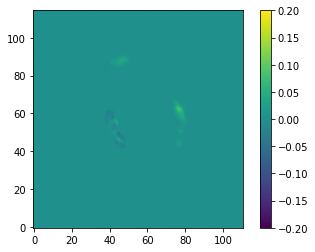

In [18]:
#Returning the interpolated image to the original variable.

img_masked.data.data[:] = GD1

#Plot residual
plt.imshow(original.data.data - img_masked.data.data, origin="lower", vmin=-0.2, vmax=0.2)
plt.colorbar()

fits.writeto(filename=data_path+"linear_residual.fits", data=original.data.data - img_masked.data.data, overwrite=True)
img_masked.write(data_path+"HST_linear_interpolation.fits")

## Cubic interpolation 

In [19]:
#Generating the grid on which the new interpolated image will be stored
x = np.arange(0, to_interp.shape[1])
y = np.arange(0, to_interp.shape[0])

#mask invalid values
to_interp = np.ma.masked_invalid(to_interp)
xx, yy = np.meshgrid(x, y)

#get only the valid values
x1 = xx[~to_interp.mask]
y1 = yy[~to_interp.mask]
newarr = to_interp[~to_interp.mask]

#Interpolation
GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                             method='cubic')

INFO: 
        Inconsistent SIP distortion information is present in the current WCS:
        SIP coefficients were detected, but CTYPE is missing "-SIP" suffix,
        therefore the current WCS is internally inconsistent.

        Because relax has been set to True, the resulting output WCS will have
        "-SIP" appended to CTYPE in order to make the header internally consistent.

        However, this may produce incorrect astrometry in the output WCS, if
        in fact the current WCS is already distortion-corrected.

        Therefore, if current WCS is already distortion-corrected (eg, drizzled)
        then SIP distortion components should not apply. In that case, for a WCS
        that is already distortion-corrected, please remove the SIP coefficients
        from the header.

         [astropy.wcs.wcs]


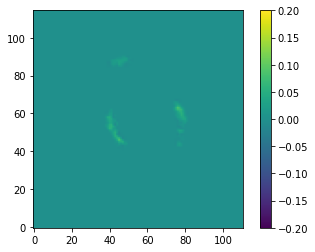

In [20]:
#Returning the interpolated image to the original variable.

img_masked.data.data[:] = GD1

#Plot residual
plt.imshow(original.data.data - img_masked.data.data, origin="lower", vmin=-0.2, vmax=0.2)
plt.colorbar()

fits.writeto(filename=data_path+"cubic_residual.fits", data=original.data.data - img_masked.data.data, overwrite=True)
img_masked.write(data_path+"HST_cubic_interpolation.fits")

## Comparing

In [21]:
linear = Image(data_path+"HST_linear_interpolation.fits", ext=1)
cubic = Image(data_path+"HST_cubic_interpolation.fits", ext=1)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

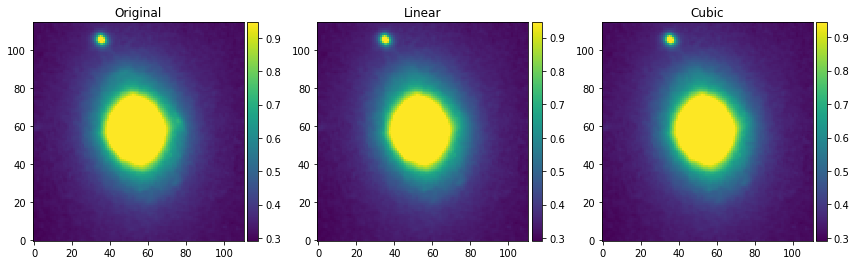

In [22]:
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

original.plot(ax=ax1, title="Original", colorbar='v', zscale=True)
linear.plot(ax=ax2, title="Linear", colorbar='v', zscale=True)
cubic.plot(ax=ax3, title="Cubic", colorbar='v', zscale=True)

#plt.savefig(data_path+"Comparing_Interpolations.png",fmt="png")

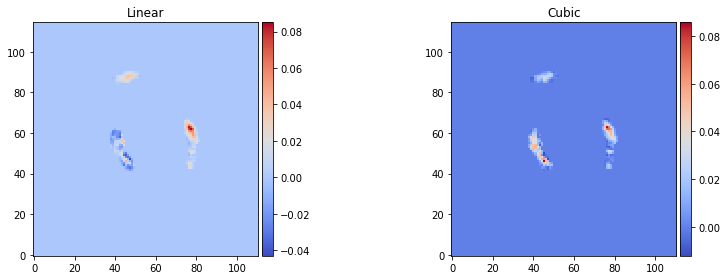

In [24]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)

(original-linear).plot(ax=ax1, title="Linear", colorbar='v',  cmap="coolwarm")
(original-cubic).plot(ax=ax2, title="Cubic", colorbar='v', cmap="coolwarm")

#plt.savefig("/home/carlos/Desktop/SDP/Dynamics/HST Data Reduction/Figs/Residual_Interpolations.png",fmt="png")

## Puting WCS in the Arcs Image

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Image


In [32]:
arcs   = Image(data_path+"Arcs.fits")                 # Image of the arcs
hst    = Image("/home/carlos/Desktop/HST Data Reduction/Data/Centered/HST_final.fits")     #Original image. We are extracting the WCS from it.

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


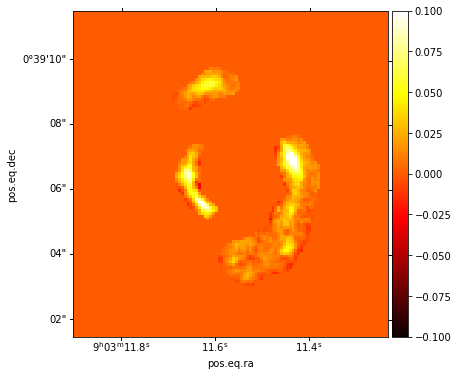

In [33]:
arcs.wcs = hst.wcs   #Setting the WCS

plt.figure(figsize=(8,6))
arcs.plot(use_wcs=True, zscale=True, colorbar="v", cmap="hot")

In [34]:
arcs.write(data_path+"Arcs_wcs.fits")   #Saving Arcs with WCS

INFO: 
        Inconsistent SIP distortion information is present in the current WCS:
        SIP coefficients were detected, but CTYPE is missing "-SIP" suffix,
        therefore the current WCS is internally inconsistent.

        Because relax has been set to True, the resulting output WCS will have
        "-SIP" appended to CTYPE in order to make the header internally consistent.

        However, this may produce incorrect astrometry in the output WCS, if
        in fact the current WCS is already distortion-corrected.

        Therefore, if current WCS is already distortion-corrected (eg, drizzled)
        then SIP distortion components should not apply. In that case, for a WCS
        that is already distortion-corrected, please remove the SIP coefficients
        from the header.

         [astropy.wcs.wcs]
